1. Importação das bibliotecas

In [3]:
import pandas as pd

2. Leitura da base de dados

In [4]:
df_transport = pd.read_csv('./data/dados_onibus.csv', delimiter=',', encoding='UTF-8',low_memory=False)
df_transport.head()

,linha,data_hora,validations_per_hour,d_semana,hour_sin,hour_cos,hora,d_mes,d_ano,mes,semana_do_mes,domingo,segunda,terca,quarta,quinta,sexta,sabado,feriado,vespera_feriado
0,1,2018-01-01 00:00:00,29,0,0.000000,1.000000,0,1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,1,2018-01-01 01:00:00,58,0,0.269797,0.962917,1,1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,1,2018-01-01 02:00:00,42,0,0.519584,0.854419,2,1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,1,2018-01-01 03:00:00,49,0,0.730836,0.682553,3,1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,1,2018-01-01 04:00:00,112,0,0.887885,0.460065,4,1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


3. Verificando quais são as 10 linhas de ônibs quue mais possuem passageiros

In [5]:
passageiros = df_transport.groupby('linha')['validations_per_hour'].sum().sort_values(ascending=False).head(10)
linhas = passageiros.index.to_list()
print(f'Linhas com mais passageiros: {linhas}')
print(f'Quantidade de passageiros: {passageiros.values.tolist()}')

Linhas com mais passageiros: [3, 41, 42, 45, 51, 24, 76, 712, 52, 74]
Quantidade de passageiros: [2609730, 2482829, 2382336, 2341606, 2119475, 2071033, 2058597, 2003204, 1991989, 1991891]


4. Selecionando a linha que possue a maior quantidade de passageiros

In [6]:
df_transport2 = df_transport.loc[df_transport['linha'] == linhas[0]]
display(df_transport2.sample(5))
print(df_transport2.shape)

,linha,data_hora,validations_per_hour,d_semana,hour_sin,hour_cos,hora,d_mes,d_ano,mes,semana_do_mes,domingo,segunda,terca,quarta,quinta,sexta,sabado,feriado,vespera_feriado
6022,3,2018-02-06 20:00:00,742,1,-0.730836,0.682553,20,6,37,2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
7387,3,2018-04-04 21:00:00,544,2,-0.519584,0.854419,21,4,94,4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
9025,3,2018-06-11 18:00:00,1500,0,-0.979084,0.203456,18,11,162,6,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6476,3,2018-02-25 14:00:00,344,6,-0.631088,-0.775711,14,25,56,2,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
6915,3,2018-03-15 22:00:00,729,3,-0.269797,0.962917,22,15,74,3,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0


(5108, 20)


5. Selecionando algumas colunas

In [7]:
df_tranport3 = df_transport2[['linha','data_hora','validations_per_hour', 'feriado','vespera_feriado']]

6. Separando a coluna data_hora em duas colunas, uma só com a data e outra só com a hora

In [8]:
df_tranport3 = df_tranport3.copy()
df_tranport3.loc[:, 'data'] = pd.to_datetime(df_tranport3['data_hora']).dt.date
df_tranport3.loc[:, 'hora'] = pd.to_datetime(df_tranport3['data_hora']).dt.hour

df_tranport3.loc[:, 'dia'] = pd.to_datetime(df_tranport3['data']).dt.day
df_tranport3.loc[:, 'mes'] = pd.to_datetime(df_tranport3['data']).dt.month
df_tranport3.loc[:, 'ano'] = pd.to_datetime(df_tranport3['data']).dt.year

df_tranport3.loc[:, 'dia_semana'] = pd.to_datetime(df_tranport3['data']).dt.dayofweek

df_tranport3

,linha,data_hora,validations_per_hour,feriado,vespera_feriado,data,hora,dia,mes,ano,dia_semana
5120,3,2018-01-01 01:00:00,5,1,0,2018-01-01,1,1,1,2018,0
5121,3,2018-01-01 02:00:00,24,1,0,2018-01-01,2,1,1,2018,0
5122,3,2018-01-01 03:00:00,23,1,0,2018-01-01,3,1,1,2018,0
5123,3,2018-01-01 04:00:00,24,1,0,2018-01-01,4,1,1,2018,0
5124,3,2018-01-01 05:00:00,64,1,0,2018-01-01,5,1,1,2018,0
...,...,...,...,...,...,...,...,...,...,...,...
10223,3,2018-07-31 19:00:00,859,0,0,2018-07-31,19,31,7,2018,1
10224,3,2018-07-31 20:00:00,706,0,0,2018-07-31,20,31,7,2018,1
10225,3,2018-07-31 21:00:00,537,0,0,2018-07-31,21,31,7,2018,1
10226,3,2018-07-31 22:00:00,548,0,0,2018-07-31,22,31,7,2018,1


7. Agrupando os valores duplicados e somando a validations_per_hour

In [9]:
df_tranport3['validations_per_hour'] = df_tranport3.groupby('data_hora')['validations_per_hour'].transform('sum')
df_tranport3 = df_tranport3.drop_duplicates(keep='last')
df_tranport3 = df_tranport3[['linha','validations_per_hour','dia','mes','ano','dia_semana','feriado','vespera_feriado','hora']]
df_tranport3

,linha,validations_per_hour,dia,mes,ano,dia_semana,feriado,vespera_feriado,hora
5120,3,5,1,1,2018,0,1,0,1
5121,3,24,1,1,2018,0,1,0,2
5122,3,23,1,1,2018,0,1,0,3
5123,3,24,1,1,2018,0,1,0,4
5124,3,64,1,1,2018,0,1,0,5
...,...,...,...,...,...,...,...,...,...
10223,3,859,31,7,2018,1,0,0,19
10224,3,706,31,7,2018,1,0,0,20
10225,3,537,31,7,2018,1,0,0,21
10226,3,548,31,7,2018,1,0,0,22


8. selecionando os meses

In [10]:
df_transport4 = df_tranport3.loc[df_tranport3['mes'].isin([1,2,3])]
df_transport4

,linha,validations_per_hour,dia,mes,ano,dia_semana,feriado,vespera_feriado,hora
5120,3,5,1,1,2018,0,1,0,1
5121,3,24,1,1,2018,0,1,0,2
5122,3,23,1,1,2018,0,1,0,3
5123,3,24,1,1,2018,0,1,0,4
5124,3,64,1,1,2018,0,1,0,5
...,...,...,...,...,...,...,...,...,...
7290,3,950,31,3,2018,5,0,0,19
7291,3,704,31,3,2018,5,0,0,20
7292,3,492,31,3,2018,5,0,0,21
7293,3,609,31,3,2018,5,0,0,22


9. Lista de dados utilizada no prompt

In [23]:
import json

# Convertendo as colunas 'mes' e 'dia' para strings
df_transport4['mes'] = df_transport4['mes'].astype(str)
df_transport4['dia'] = df_transport4['dia'].astype(str)

# Seu código para ajustar o DataFrame df_transport4
df_transport4 = df_transport4[:1440]

dados = {}

for mes in df_transport4['mes'].unique():
    dados[mes] = {}
    for dia in df_transport4.loc[df_transport4['mes'] == mes]['dia'].unique():
        dados[mes][dia] = {}
        dados[mes][dia]["dia_semana"] = int(df_transport4.loc[(df_transport4['mes'] == mes) & (df_transport4['dia'] == dia)]['dia_semana'].values[0])
        dados[mes][dia]["passageiros"] = ",".join(map(str, df_transport4.loc[(df_transport4['mes'] == mes) & (df_transport4['dia'] == dia)]['validations_per_hour'].values.tolist()))
        dados[mes][dia]["feriado"] = int(df_transport4.loc[(df_transport4['mes'] == mes) & (df_transport4['dia'] == dia)]['feriado'].values[0])

        
        # Exibindo os dados no formato JSON
print(json.dumps(dados, indent=4))


{
    "1": {
        "1": {
            "dia_semana": 0,
            "passageiros": "5,24,23,24,64,258,209,196,209,200,155,130,156,222,235,337,447,391,422,249,211,166,41",
            "hora": "1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23",
            "feriado": 1,
            "vespera_feriado": 0
        },
        "2": {
            "dia_semana": 1,
            "passageiros": "6,3,12,5,108,303,595,463,479,513,625,697,663,690,739,876,1083,1157,1121,914,627,501,686,82",
            "hora": "0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23",
            "feriado": 0,
            "vespera_feriado": 0
        },
        "3": {
            "dia_semana": 2,
            "passageiros": "22,12,5,3,56,251,525,464,390,430,551,774,767,751,879,909,978,1188,1150,943,687,506,659,66",
            "hora": "0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23",
            "feriado": 0,
            "vespera_feriado": 0
        },
        "4": {
            "dia_sema

In [27]:
x = [5, 24, 23, 24, 64, 258, 209, 196, 209, 200, 155, 130, 156, 222, 235, 337, 447, 391, 422, 249, 211, 166, 41, 6, 3, 12, 5, 108, 303, 595, 463, 479, 513, 625, 697, 663, 690, 739, 876, 1083, 1157, 1121, 914, 627, 501, 686, 82, 22, 12, 5, 3, 56, 251, 525, 464, 390, 430, 551, 774, 767, 751, 879, 909, 978, 1188, 1150, 943, 687, 506, 659, 66, 23, 4, 4, 2, 68, 256, 465, 422, 413, 452, 555, 724, 809, 723, 777, 792, 1083, 1187, 1144, 950, 655, 523, 554, 73, 24, 7, 9, 6, 62, 245, 479, 445, 418, 491, 654, 806, 907, 810, 914, 1023, 1251, 1251, 1202, 1043, 753, 551, 630, 87, 22, 15, 5, 7, 62, 163, 274, 334, 396, 397, 506, 630, 763, 705, 814, 924, 951, 996, 1038, 886, 846, 713, 726, 104, 30, 15, 9, 12, 28, 95, 149, 204, 165, 183, 219, 253, 262, 241, 332, 464, 707, 671, 867, 766, 690, 733, 245, 50, 15, 5, 10, 8, 126, 353, 605, 574, 514, 507, 716, 879, 941, 885, 906, 1072, 1255, 1407, 1270, 1214, 1052, 795, 747, 112, 33, 2, 6, 5, 55, 258, 529, 493, 382, 487, 635, 785, 844, 768, 824, 903, 1045, 1330, 1254, 951, 718, 505, 597, 60, 15, 5, 6, 3, 58, 274, 523, 449, 422, 417, 550, 738, 648, 677, 811, 942, 1098, 1373, 1230, 927, 675, 515, 583, 78, 18, 14, 9, 4, 44, 271, 503, 430, 405, 418, 532, 767, 761, 677, 798, 847, 1045, 1253, 1152, 920, 706, 474, 596, 78, 29, 6, 8, 1, 68, 252, 498, 452, 398, 414, 561, 736, 734, 668, 768, 851, 1089, 1253, 1228, 876, 711, 506, 642, 70, 20, 19, 7, 7, 69, 191, 330, 314, 362, 353, 481, 676, 756, 697, 702, 793, 1004, 923, 964, 901, 815, 666, 738, 72, 23, 13, 10, 8, 43, 104, 147, 166, 177, 164, 227, 237, 182, 254, 321, 453, 707, 778, 771, 726, 648, 709, 217, 42, 29, 4, 13, 9, 114, 386, 649, 590, 498, 486, 649, 834, 804, 785, 815, 931, 1112, 1506, 1458, 1187, 990, 754, 781, 77, 48, 5, 6, 2, 52, 294, 519, 468, 417, 423, 659, 833, 795, 736, 874, 878, 1030, 1272, 1191, 989, 705, 589, 640, 66, 16, 7, 7, 6, 60, 273, 524, 453, 403, 379, 626, 768, 727, 738, 776, 832, 1015, 1323, 1217, 798, 673, 601, 627, 65, 14, 8, 6, 7, 56, 266, 441, 437, 382, 403, 521, 739, 721, 706, 742, 886, 991, 1237, 1092, 827, 607, 470, 633, 69, 16, 7, 10, 6, 62, 254, 452, 384, 460, 359, 532, 708, 722, 763, 820, 908, 1109, 1272, 1322, 1005, 786, 574, 652, 77, 17, 23, 6, 6, 50, 197, 314, 311, 331, 371, 496, 657, 706, 691, 700, 764, 895, 1070, 1035, 879, 915, 603, 795, 88, 16, 18, 17, 9, 38, 91, 144, 153, 177, 201, 206, 231, 217, 262, 337, 546, 598, 776, 822, 704, 600, 743, 269, 45, 17, 12, 5, 8, 129, 381, 647, 571, 529, 496, 550, 860, 805, 799, 816, 1008, 1179, 1549, 1392, 1080, 863, 704, 786, 98, 37, 3, 4, 4, 65, 293, 526, 478, 430, 395, 607, 736, 758, 671, 773, 890, 983, 1294, 1193, 790, 628, 400, 587, 55, 15, 8, 4, 2, 64, 282, 475, 434, 383, 384, 557, 679, 698, 665, 719, 825, 975, 1228, 1147, 769, 623, 456, 588, 57, 17, 5, 3, 13, 60, 274, 489, 456, 355, 383, 490, 687, 660, 660, 712, 891, 1091, 1171, 1151, 835, 574, 468, 621, 59, 21, 16, 7, 6, 64, 276, 471, 529, 404, 368, 561, 686, 805, 662, 798, 939, 1069, 1235, 1173, 938, 720, 537, 702, 68, 15, 19, 6, 9, 48, 186, 296, 341, 322, 326, 431, 519, 604, 547, 590, 659, 771, 698, 809, 657, 573, 421, 667, 61, 37, 14, 4, 9, 52, 96, 127, 186, 158, 140, 175, 246, 198, 271, 386, 510, 686, 806, 725, 761, 595, 664, 241, 37, 19, 11, 4, 9, 120, 404, 580, 574, 520, 512, 595, 832, 799, 674, 730, 914, 1210, 1267, 1257, 950, 669, 537, 722, 86, 17, 9, 1, 4, 52, 304, 518, 526, 401, 447, 528, 768, 738, 685, 837, 904, 1034, 1210, 1071, 824, 679, 457, 590, 66, 19, 17, 1, 8, 55, 298, 570, 438, 427, 451, 622, 734, 805, 712, 740, 857, 1079, 1282, 1292, 845, 747, 506, 618, 69, 15, 14, 3, 10, 52, 330, 588, 478, 415, 464, 586, 822, 748, 697, 786, 964, 1075, 1256, 1216, 923, 739, 511, 627, 96, 10, 10, 7, 7, 71, 305, 606, 548, 424, 445, 607, 784, 876, 831, 870, 971, 1142, 1315, 1109, 921, 709, 496, 632, 72, 20, 12, 7, 8, 49, 203, 287, 309, 372, 398, 488, 737, 890, 789, 775, 843, 977, 1067, 1053, 953, 866, 575, 690, 104, 22, 8, 19, 9, 36, 131, 151, 220, 183, 160, 227, 292, 244, 362, 352, 440, 507, 702, 675, 612, 430, 535, 195, 49, 17, 9, 11, 7, 100, 455, 689, 680, 562, 469, 605, 705, 851, 837, 871, 1027, 1286, 1456, 1331, 993, 866, 683, 705, 91, 14, 7, 8, 1, 60, 357, 620, 571, 484, 443, 639, 911, 873, 803, 911, 996, 1163, 1450, 1338, 981, 742, 623, 682, 64, 18, 5, 2, 9, 61, 299, 654, 534, 468, 456, 559, 872, 840, 788, 903, 1001, 1299, 1457, 1243, 1030, 830, 652, 705, 81, 16, 6, 9, 7, 60, 343, 666, 532, 445, 488, 616, 804, 972, 799, 801, 982, 1163, 1325, 1367, 973, 800, 551, 714, 93, 19, 13, 6, 8, 59, 308, 588, 516, 456, 461, 548, 715, 891, 855, 882, 997, 1302, 1326, 1311, 1031, 814, 671, 837, 80, 26, 8, 9, 7, 52, 185, 243, 262, 201, 253, 379, 529, 622, 566, 618, 674, 774, 835, 778, 668, 645, 669, 549, 64, 20, 7, 5, 6, 35, 85, 141, 154, 148, 158, 166, 154, 123, 151, 204, 303, 357, 350, 335, 242, 211, 112, 167, 50, 14, 12, 4, 1, 37, 111, 195, 188, 105, 121, 136, 162, 140, 218, 248, 277, 383, 427, 364, 355, 488, 339, 275, 41, 13, 7, 8, 2, 25, 79, 154, 158, 181, 189, 200, 168, 199, 173, 313, 282, 390, 503, 372, 326, 515, 148, 218, 46, 9, 8, 14, 3, 34, 193, 296, 299, 249, 294, 318, 400, 483, 591, 661, 781, 970, 943, 938, 608, 399, 309, 535, 48, 7, 5, 15, 2, 83, 349, 539, 522, 425, 440, 615, 768, 820, 753, 895, 871, 1223, 1345, 1272, 925, 739, 631, 647, 85, 23, 9, 11, 5, 63, 296, 581, 524, 415, 409, 583, 788, 828, 803, 869, 982, 1202, 1336, 1320, 1043, 714, 633, 683, 61, 22, 15, 6, 4, 46, 172, 301, 312, 272, 269, 367, 543, 697, 577, 672, 825, 949, 1029, 944, 887, 701, 611, 642, 67, 31, 21, 7, 6, 36, 85, 129, 164, 158, 168, 183, 241, 166, 266, 335, 471, 649, 724, 793, 675, 644, 727, 204, 42, 14, 8, 4, 6, 112, 394, 802, 614, 603, 526, 634, 802, 878, 757, 826, 1002, 1219, 1424, 1424, 1063, 719, 727, 776, 86, 58, 11, 6, 3, 54, 339, 680, 578, 474, 439, 700, 848, 914, 792, 794, 881, 1143, 1332, 1257, 1010, 748, 660, 730, 89, 23, 6, 9, 13, 59, 293, 664, 534, 428, 498, 603, 754, 745, 667, 765, 798, 1088, 1320, 1263, 793, 656, 611, 749, 74, 26, 9, 7, 7, 62, 328, 693, 521, 394, 367, 562, 701, 764, 743, 727, 924, 1087, 1276, 1175, 737, 569, 551, 689, 75, 22, 8, 12, 4, 57, 321, 628, 508, 441, 469, 602, 766, 886, 689, 814, 833, 1042, 1279, 1176, 876, 623, 585, 724, 86, 24, 15, 11, 6, 42, 199, 311, 372, 354, 333, 480, 668, 755, 707, 698, 708, 957, 908, 961, 874, 740, 560, 660, 80, 20, 11, 11, 4, 50, 113, 150, 220, 144, 127, 181, 199, 255, 283, 344, 414, 682, 710, 683, 660, 596, 598, 247, 43, 21, 7, 10, 22, 100, 460, 819, 630, 620, 518, 725, 891, 979, 778, 818, 908, 1197, 1412, 1302, 910, 675, 742, 834, 85, 20, 1, 2, 49, 297, 697, 540, 460, 481, 702, 948, 873, 810, 811, 807, 1115, 1291, 1197, 788, 585, 561, 694, 77, 13, 6, 1, 14, 54, 332, 674, 522, 484, 482, 723, 938, 884, 779, 822, 931, 1191, 1308, 1259, 840, 713, 626, 734, 77, 11, 9, 4, 9, 60, 315, 667, 518, 420, 441, 685, 839, 832, 698, 760, 762, 1023, 1243, 1282, 846, 678, 636, 677, 95, 21, 11]


1440

In [43]:
df_tranport3[1440:1450]

,linha,validations_per_hour,dia,mes,ano,dia_semana,hora
6583,3,6,2,3,2018,4,2
6584,3,9,2,3,2018,4,3
6585,3,64,2,3,2018,4,4
6586,3,343,2,3,2018,4,5
6587,3,647,2,3,2018,4,6
6588,3,574,2,3,2018,4,7
6589,3,460,2,3,2018,4,8
6590,3,510,2,3,2018,4,9
6591,3,637,2,3,2018,4,10
6592,3,916,2,3,2018,4,11


In [80]:
x = [7,9,7,9,54,224,457,376,381,407,507,684,724,643,713,789,941,1022,1042,863,672,567,607,72,26,30,25,96,422,763,639,554,575,726,949,1004,895,947,1041,1225,1338,1396,1173,952,800,844,107]

In [81]:
print(len(x))

47


In [82]:
df_tranport3[720:767]

,linha,validations_per_hour,dia,mes,ano,dia_semana,hora
5853,3,17,31,1,2018,2,1
5854,3,1,31,1,2018,2,2
5855,3,8,31,1,2018,2,3
5856,3,55,31,1,2018,2,4
5857,3,298,31,1,2018,2,5
5858,3,570,31,1,2018,2,6
5859,3,438,31,1,2018,2,7
5860,3,427,31,1,2018,2,8
5861,3,451,31,1,2018,2,9
5862,3,622,31,1,2018,2,10


13. Gráfico de 10 horas previstas

Text(0.5, 1.0, 'Passageiros por Horário / 47 horas')

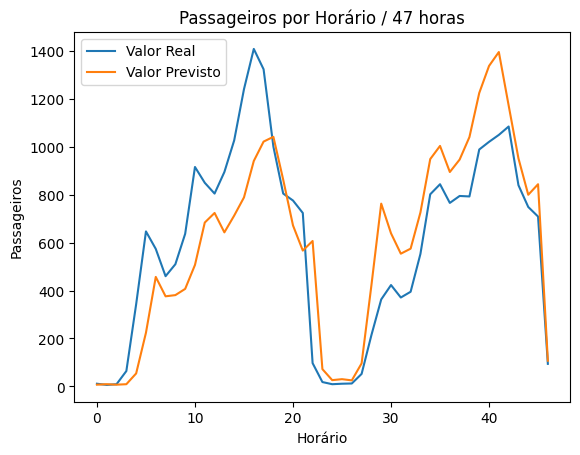

In [89]:
import matplotlib.pyplot as plt

previsto = x
exato = df_tranport3[1439:1486]['validations_per_hour'].tolist()

plt.plot(exato, label='Valor Real')
plt.plot(previsto, label='Valor Previsto' )

plt.legend()
plt.xlabel('Horário')
plt.ylabel('Passageiros')
plt.title('Passageiros por Horário / 47 horas')

14. Gráfico de 144 horas previstas

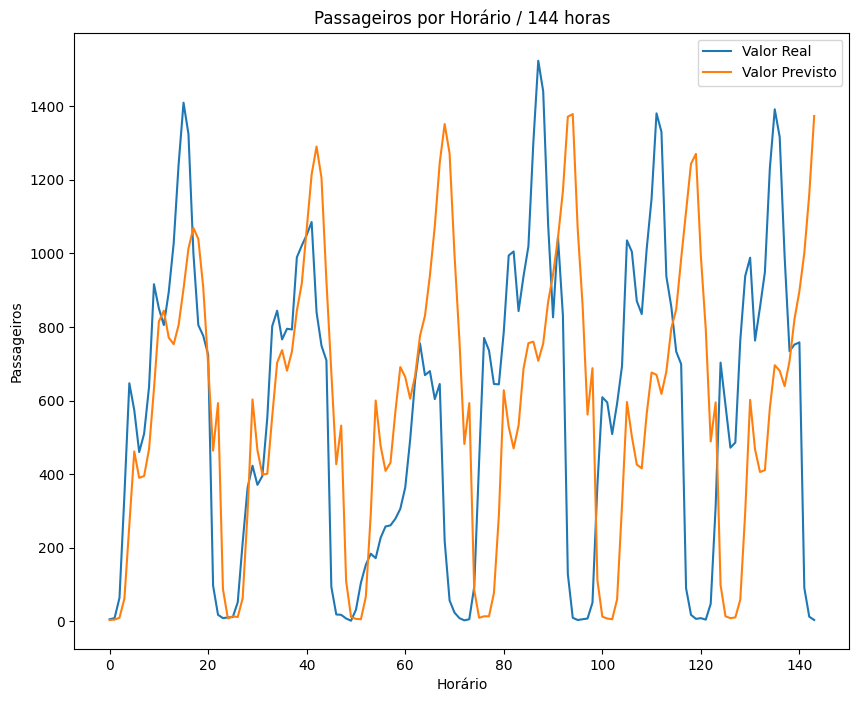

In [62]:
plt.figure(figsize=(10, 8))  # Set the figure size to 10 inches by 6 inches

previsto = x
exato = df_tranport3[1440:1584]['validations_per_hour'].tolist()

plt.plot(exato, label='Valor Real')
plt.plot(previsto, label='Valor Previsto')

plt.legend()
plt.xlabel('Horário')
plt.ylabel('Passageiros')
plt.title('Passageiros por Horário / 144 horas')
plt.show()

In [23]:
df_tranport3[820:]

,linha,data_hora,validations_per_hour,data,hora,mes,dia
5959,3,2018-02-04 05:00:00,131,2018-02-04,5,2,4
5960,3,2018-02-04 06:00:00,151,2018-02-04,6,2,4
5961,3,2018-02-04 07:00:00,220,2018-02-04,7,2,4
5962,3,2018-02-04 08:00:00,183,2018-02-04,8,2,4
5963,3,2018-02-04 09:00:00,160,2018-02-04,9,2,4
...,...,...,...,...,...,...,...
10223,3,2018-07-31 19:00:00,859,2018-07-31,19,7,31
10224,3,2018-07-31 20:00:00,706,2018-07-31,20,7,31
10225,3,2018-07-31 21:00:00,537,2018-07-31,21,7,31
10226,3,2018-07-31 22:00:00,548,2018-07-31,22,7,31



Para prosseguir com a análise da série temporal de passageiros das linhas de ônibus da Secretaria de Transportes Públicos de Fortaleza, foi solicitado o desenvolvimento de um código para gerar a continuação dos dados. O objetivo é gerar um array contendo os números de passageiros para as próximas horas, seguindo a estrutura já estabelecida, onde cada valor corresponde a uma hora subsequente, A LISTA COMEÇA COM QUANTIDADE DE PASSAGEIROS AS 01:00 DA MANHÃ do domingo. Vale salientar que o fim de semana e em feriados o fluxos de passageiros diminui, o horario de 16 - 20 horas são considerados horarios de pico

A sequencia que você deve continuar é:

[5,24,23,24,64,258,209,196,209,200,155,130,156,222,235,337,447,391,422,249,211,166,41,6,3,12,5,108,303,595,463,479,513,625,697,663,690,739,876,1083,1157,1121,914,627,501,686,82,22,12,5,3,56,251,525,464,390,430,551,774,767,751,879,909,978,1188,1150,943,687,506,659,66,23,4,4,2,68,256,465,422,413,452,555,724,809,723,777,792,1083,1187,1144,950,655,523,554,73,24,7,9,6,62,245,479,445,418,491,654,806,907,810,914,1023,1251,1251,1202,1043,753,551,630,87,22,15,5,7,62,163,274,334,396,397,506,630,763,705,814,924,951,996,1038,886,846,713,726,104,1,29,15,9,12,28,95,149,204,165,183,219,253,262,241,332,464,707,671,867,766,690,733,245,50,15,5,10,8,126,353,605,574,514,507,716,879,941,885,906,1072,1255,1407,1270,1214,1052,795,747,112,33,2,6,5,55,258,529,493,382,487,635,785,844,768,824,903,1045,1330,1254,951,718,505,597,60,15,5,6,3,58,274,523,449,422,417,550,738,648,677,811,942,1098,1373,1230,927,675,515,583,78,18,14,9,4,44,271,503,430,405,418,532,767,761,677,798,847,1045,1253,1152,920,706,474,596,78,29,6,8,1,68,252,498,452,398,414,561,736,734,668,768,851,1089,1253,1228,876,711,506,642,70,20,19,7,7,69,191,330,314,362,353,481,676,756,697,702,793,1004,923,964,901,815,666,738,72,23,13,10,8,43,104,147,166,177,164,227,237,182,254,321,453,707,778,771,726,648,709,217,42,29,4,13,9,114,386,649,590,498,486,649,834,804,785,815,931,1112,1506,1458,1187,990,754,781,77,48,5,6,2,52,294,519,468,417,423,659,833,795,736,874,878,1030,1272,1191,989,705,589,640,66,16,7,7,6,60,273,524,453,403,379,626,768,727,738,776,832,1015,1323,1217,798,673,601,627,65,14,8,6,7,56,266,441,437,382,403,521,739,721,706,742,886,991,1237,1092,827,607,470,633,69,16,7,10,6,62,254,452,384,460,359,532,708,722,763,820,908,1109,1272,1322,1005,786,574,652,77,17,23,6,6,50,197,314,311,331,371,496,657,706,691,700,764,895,1070,1035,879,915,603,795,88,6,10,8,10,6,11,8,1,19,19,45,46,4,140,153,177,201,206,231,217,262,337,546,598,776,822,704,600,743,269,45,5,12,12,5,1,7,48,81,152,229,647,571,529,496,550,860,805,799,816,1008,1179,1549,1392,1080,863,704,786,98,37,3,4,4,65,293,526,478,430,395,607,736,758,671,773,890,983,1294,1193,790,628,400,587,55,15,8,4,2,64,282,475,434,383,384,557,679,698,665,719,825,975,1228,1147,769,623,456,588,57,17,5,3,13,60,274,489,456,355,383,490,687,660,660,712,891,1091,1171,1151,835,574,468,621,59,21,16,7,6,64,276,471,529,404,368,561,686,805,662,798,939,1069,1235,1173,938,720,537,702,68,15,19,6,9,48,186,296,341,322,326,431,519,604,547,590,659,771,698,809,657,573,421,667,61,1,36,14,4,9,52,96,127,186,158,140,175,246,198,271,386,510,686,806,725,761,595,664,241,37,19,11,4,9,120,404,580,574,520,512,595,832,799,674,730,914,1210,1267,1257,950,669,537,722,86,17,9,1,4,52,304,518,526,401,447,528,768]

        preveja os próximos 10 números da sequência, EXIBA APENAS O RESULTADO FINAL:

Você trabalha na Secretaria de Transportes Públicos de Fortaleza, Ceará, como Cientista de Dados. Seu superior solicitou um algoritmo para prever quantos passageiros utilizarão a linha 3 de Fortaleza nas próximas N horas. Para realizar essa tarefa, foi disponibilizado um array contendo a quantidade de pessoas que utilizam a linha 3 de hora em hora. Cada valor no array corresponde a uma hora do dia, começando às 01:00 da manhã do dia primeiro de janeiro e incrementando a cada hora subsequente. O periodo utilizado foi o mes de janeiro por completo. Seu objetivo é prever os valores das próximas horas solicitadas. A resposta deve ser um array contendo esses N valores solicitados.

A sequencia que você deve continuar é:

[5,24,23,24,64,258,209,196,209,200,155,130,156,222,235,337,447,391,422,249,211,166,41,6,3,12,5,108,303,595,463,479,513,625,697,663,690,739,876,1083,1157,1121,914,627,501,686,82,22,12,5,3,56,251,525,464,390,430,551,774,767,751,879,909,978,1188,1150,943,687,506,659,66,23,4,4,2,68,256,465,422,413,452,555,724,809,723,777,792,1083,1187,1144,950,655,523,554,73,24,7,9,6,62,245,479,445,418,491,654,806,907,810,914,1023,1251,1251,1202,1043,753,551,630,87,22,15,5,7,62,163,274,334,396,397,506,630,763,705,814,924,951,996,1038,886,846,713,726,104,1,29,15,9,12,28,95,149,204,165,183,219,253,262,241,332,464,707,671,867,766,690,733,245,50,15,5,10,8,126,353,605,574,514,507,716,879,941,885,906,1072,1255,1407,1270,1214,1052,795,747,112,33,2,6,5,55,258,529,493,382,487,635,785,844,768,824,903,1045,1330,1254,951,718,505,597,60,15,5,6,3,58,274,523,449,422,417,550,738,648,677,811,942,1098,1373,1230,927,675,515,583,78,18,14,9,4,44,271,503,430,405,418,532,767,761,677,798,847,1045,1253,1152,920,706,474,596,78,29,6,8,1,68,252,498,452,398,414,561,736,734,668,768,851,1089,1253,1228,876,711,506,642,70,20,19,7,7,69,191,330,314,362,353,481,676,756,697,702,793,1004,923,964,901,815,666,738,72,23,13,10,8,43,104,147,166,177,164,227,237,182,254,321,453,707,778,771,726,648,709,217,42,29,4,13,9,114,386,649,590,498,486,649,834,804,785,815,931,1112,1506,1458,1187,990,754,781,77,48,5,6,2,52,294,519,468,417,423,659,833,795,736,874,878,1030,1272,1191,989,705,589,640,66,16,7,7,6,60,273,524,453,403,379,626,768,727,738,776,832,1015,1323,1217,798,673,601,627,65,14,8,6,7,56,266,441,437,382,403,521,739,721,706,742,886,991,1237,1092,827,607,470,633,69,16,7,10,6,62,254,452,384,460,359,532,708,722,763,820,908,1109,1272,1322,1005,786,574,652,77,17,23,6,6,50,197,314,311,331,371,496,657,706,691,700,764,895,1070,1035,879,915,603,795,88,6,10,8,10,6,11,8,1,19,19,45,46,4,140,153,177,201,206,231,217,262,337,546,598,776,822,704,600,743,269,45,5,12,12,5,1,7,48,81,152,229,647,571,529,496,550,860,805,799,816,1008,1179,1549,1392,1080,863,704,786,98,37,3,4,4,65,293,526,478,430,395,607,736,758,671,773,890,983,1294,1193,790,628,400,587,55,15,8,4,2,64,282,475,434,383,384,557,679,698,665,719,825,975,1228,1147,769,623,456,588,57,17,5,3,13,60,274,489,456,355,383,490,687,660,660,712,891,1091,1171,1151,835,574,468,621,59,21,16,7,6,64,276,471,529,404,368,561,686,805,662,798,939,1069,1235,1173,938,720,537,702,68,15,19,6,9,48,186,296,341,322,326,431,519,604,547,590,659,771,698,809,657,573,421,667,61,1,36,14,4,9,52,96,127,186,158,140,175,246,198,271,386,510,686,806,725,761,595,664,241,37,19,11,4,9,120,404,580,574,520,512,595,832,799,674,730,914,1210,1267,1257,950,669,537,722,86,17,9,1,4,52,304,518,526,401,447,528,768]

        preveja os próximos 10 números da sequência, EXIBA APENAS O RESULTADO FINAL:

Como Cientista de Dados na Secretaria de Transportes Públicos de Fortaleza, Ceará, você recebeu uma solicitação do seu superior: 
desenvolver um algoritmo para prever o número de passageiros que utilizarão a linha 3 de Fortaleza nas próximas N horas.
 Você possui um array contendo a quantidade de pessoas que utilizam a linha 3 de hora em hora, representando todo o mês de janeiro, começando às 01:00 da manhã do dia primeiro de janeiro e incrementando a cada hora subsequente. Seu objetivo é prever os valores das próximas horas solicitadas. A resposta deve ser um array contendo esses N valores.

Segue a sequência atual:

[5,24,23,24,64,258,209,196,209,200,155,130,156,222,235,337,447,391,422,249,211,166,41,6,3,12,5,108,303,595,463,479,513,625,697,663,690,739,876,1083,1157,1121,914,627,501,686,82,22,12,5,3,56,251,525,464,390,430,551,774,767,751,879,909,978,1188,1150,943,687,506,659,66,23,4,4,2,68,256,465,422,413,452,555,724,809,723,777,792,1083,1187,1144,950,655,523,554,73,24,7,9,6,62,245,479,445,418,491,654,806,907,810,914,1023,1251,1251,1202,1043,753,551,630,87,22,15,5,7,62,163,274,334,396,397,506,630,763,705,814,924,951,996,1038,886,846,713,726,104,1,29,15,9,12,28,95,149,204,165,183,219,253,262,241,332,464,707,671,867,766,690,733,245,50,15,5,10,8,126,353,605,574,514,507,716,879,941,885,906,1072,1255,1407,1270,1214,1052,795,747,112,33,2,6,5,55,258,529,493,382,487,635,785,844,768,824,903,1045,1330,1254,951,718,505,597,60,15,5,6,3,58,274,523,449,422,417,550,738,648,677,811,942,1098,1373,1230,927,675,515,583,78,18,14,9,4,44,271,503,430,405,418,532,767,761,677,798,847,1045,1253,1152,920,706,474,596,78,29,6,8,1,68,252,498,452,398,414,561,736,734,668,768,851,1089,1253,1228,876,711,506,642,70,20,19,7,7,69,191,330,314,362,353,481,676,756,697,702,793,1004,923,964,901,815,666,738,72,23,13,10,8,43,104,147,166,177,164,227,237,182,254,321,453,707,778,771,726,648,709,217,42,29,4,13,9,114,386,649,590,498,486,649,834,804,785,815,931,1112,1506,1458,1187,990,754,781,77,48,5,6,2,52,294,519,468,417,423,659,833,795,736,874,878,1030,1272,1191,989,705,589,640,66,16,7,7,6,60,273,524,453,403,379,626,768,727,738,776,832,1015,1323,1217,798,673,601,627,65,14,8,6,7,56,266,441,437,382,403,521,739,721,706,742,886,991,1237,1092,827,607,470,633,69,16,7,10,6,62,254,452,384,460,359,532,708,722,763,820,908,1109,1272,1322,1005,786,574,652,77,17,23,6,6,50,197,314,311,331,371,496,657,706,691,700,764,895,1070,1035,879,915,603,795,88,6,10,8,10,6,11,8,1,19,19,45,46,4,140,153,177,201,206,231,217,262,337,546,598,776,822,704,600,743,269,45,5,12,12,5,1,7,48,81,152,229,647,571,529,496,550,860,805,799,816,1008,1179,1549,1392,1080,863,704,786,98,37,3,4,4,65,293,526,478,430,395,607,736,758,671,773,890,983,1294,1193,790,628,400,587,55,15,8,4,2,64,282,475,434,383,384,557,679,698,665,719,825,975,1228,1147,769,623,456,588,57,17,5,3,13,60,274,489,456,355,383,490,687,660,660,712,891,1091,1171,1151,835,574,468,621,59,21,16,7,6,64,276,471,529,404,368,561,686,805,662,798,939,1069,1235,1173,938,720,537,702,68,15,19,6,9,48,186,296,341,322,326,431,519,604,547,590,659,771,698,809,657,573,421,667,61,1,36,14,4,9,52,96,127,186,158,140,175,246,198,271,386,510,686,806,725,761,595,664,241,37,19,11,4,9,120,404,580,574,520,512,595,832,799,674,730,914,1210,1267,1257,950,669,537,722,86,17,9,1,4,52,304,518,526,401,447,528,768]

        preveja os próximos 10 números da sequência, EXIBA APENAS O RESULTADO FINAL:

Você é um assistente de previsão de séries temporais e eu vou passar para você uma série temporal oriunda da linha 3 de ônibus da cidade de Fortaleza. Será lhe passado uma lista contendo um mês de dados da linha 3, iniciando às 01 hora da manhã de um domingo, onde cada valor seguinte representa uma hora incrementada, ou seja, o próximo dado é referente às 02 horas da manhã. Seu objetivo é prever a quantidade de passageiros que utilizarão a linha nas próximas N horas solicitadas. O formato da sua saída deve ser apenas de uma lista com os N valores solicitados. Em hipótese alguma explique a sua solução ou adicione qualquer texto no início e final da lista. Informe a sequência de números só com N números previstos, não inclusos os números anteriores que você utilizou para fazer sua previsão.